# ネットワーク分析演習

## 課題
以下に記載されている説明をpythonコードを逐次実行しながら理解すること。4に関しては自身で課題に取り組むこと

### 1　小規模ネットワークの分析
ネットワークを作り描画する、各種特徴量を算出し確認する。

### 2　中規模ネットワークの分析　コミュニティ分割
ファイルからネットワークを読み込む。最大連結成分を取り出す前処理を行い、描画、クラスタリングを実施する。
### 3　中規模ネットワークの分析　指標、特徴量算出
特徴量を計算する。また、それを元に描画する
### 4　ネットワークの抽出から分析まで

人工知能学会のホームページから共著ネットワークを作成して、
1. 学会の構造を分かりやすく可視化しましょう。
2. 次数中心性が高い研究者Top10を表示してください。
3. 可能であれば過去5年分の人工知能学会のホームページから同様の分析を試してみましょう。

https://kaigi.org/jsai/webprogram/2017/paper_list.html
 


In [1]:
#インポート
import numpy as np
import pandas as pd
import networkx as nx
from networkx.convert_matrix import from_pandas_edgelist 
import community
import itertools # iteration tool
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1　小規模ネットワークの分析
ここでは簡単なネットワークの作成と描画を行います。

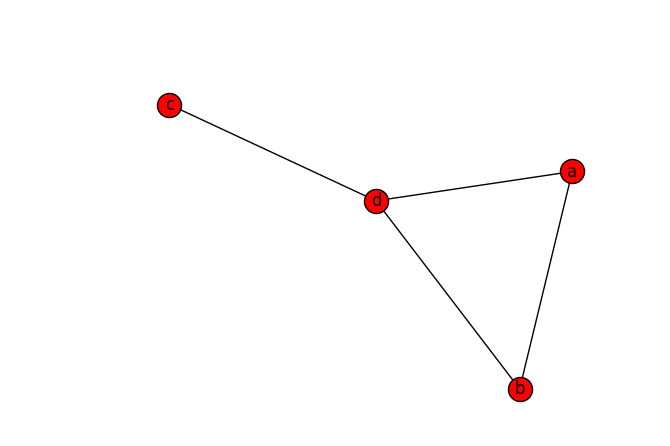

In [2]:
#小規模な無向ネットワークを作り動作を確認しよう

#グラフの初期化
G = nx.Graph()
#エッジの追加
G.add_edge('a','b' )
#エッジをリストから追加
G.add_edges_from([('c', 'd'),('d', 'a'),('d', 'b')])
#ノードの描画位置を計算
pos=nx.spring_layout(G)
#描画する
nx.draw(G,pos=pos,with_labels=True)

In [3]:
?nx.draw

### 2　中規模ネットワークの分析　コミュニティ分割
ファイルからネットワークを読み込む。最大連結成分を取り出す前処理を行い、描画、クラスタリングを実施する。

In [4]:
#空手クラブネットワークをDataFrame読み込む
network_df = pd.read_csv('./karate.csv',index_col=0)
#上から2つを表示して内容を確認
network_df

,from,to
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
5,0,6
6,0,7
7,0,8
8,0,10
9,0,11


In [5]:
network_df[network_df["from"] == 22]

,from,to
55,22,32
56,22,33


In [6]:
?nx.spring_layout

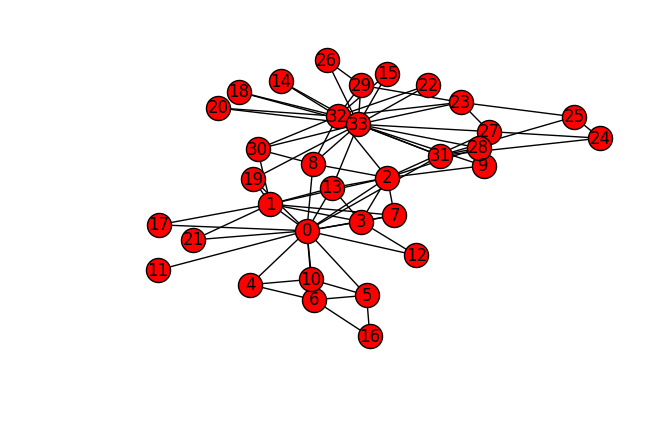

In [7]:
G = from_pandas_edgelist(network_df,source="from",target="to")
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels="True")

### クラスタリング

In [8]:
?plt.cm.RdYlBu

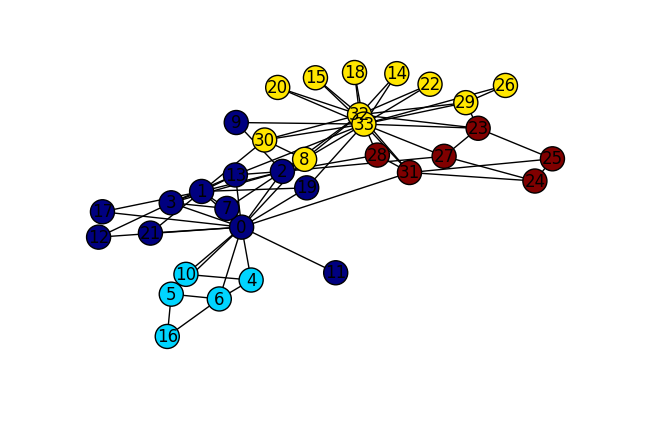

In [9]:
#Louvain法でクラスタリングする
partition = community.best_partition(G)


#描画する
pos = nx.spring_layout(G) 
nx.draw(G,with_labels=True,pos=pos,
        node_color=list(partition.values()))


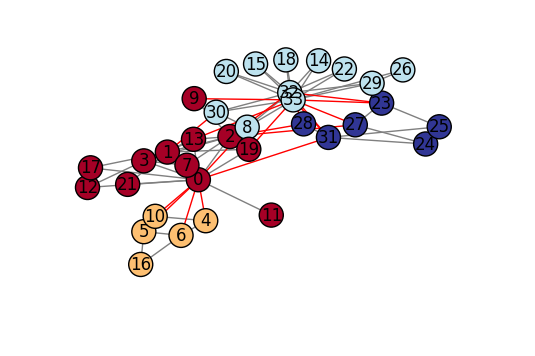

In [10]:
#クラスタ間をつなぐエッジを強調して描画する

#描画する
# plt.figure(figsize=(6, 6))  # image is 8 x 8 inches
plt.axis('off')

#ノードだけ描画
nx.draw_networkx_nodes(G,label=True,pos=pos,
        node_color=list(partition.values()),
        cmap=plt.cm.RdYlBu )
nx.draw_networkx_labels(G,pos=pos)

#同じクラスタ間のエッジだけ黒で描画する　
edges_same_cluster = [(f,t) for f,t in G.edges() 
                      if partition[f] == partition[t] ]

nx.draw_networkx_edges(G,edgelist=edges_same_cluster
                       ,pos=pos,edge_color='gray')

#違うクラスタ間のエッジだけ赤で描画する　
edges_diff_cluster = [(f,t) for f,t in G.edges() 
                      if partition[f] != partition[t] ]

nx.draw_networkx_edges(G,edgelist=edges_diff_cluster
                       ,pos=pos,edge_color='red')

In [11]:
#モジュラリティを手計算する。（計算速度は気にせず、式の定義どおり）
Q = 0
degree = G.degree()
m = len(G.edges())
for f in G.nodes():
    for t in G.nodes():
        if partition[f] == partition[t]:
            if t in G.neighbors(f):
                Q+= 1
            Q -= degree[f] * degree[t] / (2 * m )
modularity = Q / (2 * m )
print(modularity)

#モジュラリティをパッケージを使って計算
print(community.modularity(partition,G))

0.4188034188034182
0.4188034188034188


In [12]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 2,
 15: 2,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 31: 3,
 32: 2,
 33: 2}

### 3　中規模ネットワークの分析　指標、特徴量算出
特徴量を計算する。また、それを元に描画する

In [39]:
#距離の計算
print(nx.shortest_path_length(G,source=2,target=22))

#平均最短距離の計算
print(nx.average_shortest_path_length(G))

2
2.408199643493761


In [48]:
#特徴量の計算
degree_centrality = G.degree()
pagerank = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)

print("ノードの次数",degree_centrality)
print("pagerank",nx.pagerank(G))
print("betweenness",betweenness_centrality)

ノードの次数 [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (10, 3), (11, 1), (12, 2), (13, 5), (17, 2), (19, 3), (21, 2), (31, 6), (30, 4), (32, 12), (9, 2), (27, 4), (28, 3), (16, 2), (33, 17), (14, 2), (15, 2), (18, 2), (20, 2), (22, 2), (23, 5), (25, 3), (29, 4), (24, 3), (26, 2)]
pagerank {0: 0.09700181758983709, 1: 0.05287839103742701, 2: 0.057078423047636745, 3: 0.03586064322306479, 4: 0.021979406974834498, 5: 0.02911334166344221, 6: 0.029113341663442212, 7: 0.024490758039509182, 8: 0.029765339186167035, 10: 0.0219794069748345, 11: 0.009564916863537148, 12: 0.014645186487916191, 13: 0.029536314977202986, 17: 0.014558859774243493, 19: 0.019604416711937297, 21: 0.014558859774243493, 31: 0.03715663592267942, 30: 0.02458933653429248, 32: 0.07169213006588289, 9: 0.014308950284462801, 27: 0.025638803528350497, 28: 0.01957296050943854, 16: 0.016785378110253487, 33: 0.10091791674871213, 14: 0.014535161524273827, 15: 0.014535161524273827, 18: 0.014535161524273827, 2

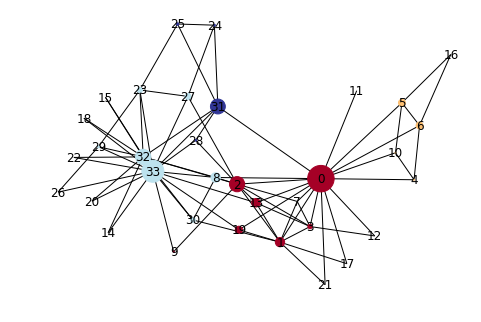

In [49]:
#ノードの大きさを特徴量から算出
input_values = np.array(list(betweenness_centrality.values()))
node_size= input_values  / np.max(input_values)

#ノードの大きさをかえて描画
nx.draw(G,with_labels=True,pos=pos,
        node_color=list(partition.values()),
        cmap=plt.cm.RdYlBu,
        node_size = [v * 700 for v in node_size]
        )


In [58]:
#行列表現の取得
matrix_sparce = nx.adjacency_matrix(G)
# np.array(matrix_sparce)
matrix_sparce.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [62]:
matrix_sparce.todense()

(34, 34)

### 4　ネットワークの抽出から分析まで

人工知能学会のホームページから共著ネットワークを作成して、
1. 学会の構造を分かりやすく可視化しましょう。
2. 次数中心性が高い研究者Top10を表示してください。
3. 可能であれば過去5年分の人工知能学会のホームページから同様の分析を試してみましょう。

https://kaigi.org/jsai/webprogram/2017/paper_list.html

In [10]:
#共著ネットワークを作成する

from bs4 import BeautifulSoup
import urllib.request as req
import re

#スクレイピング　途中までサンプル
url = "https://kaigi.org/jsai/webprogram/2017/paper_list.html"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")
topics = soup.find_all('li')
for topic in topics[:3]:
    authors = []
    for authors_text in topic.find_all('span'):
        for author_text in authors_text.text.split(')')[:-1]:
            authors.append(author_text.split('(')[0])
    print(authors)

['菊田 遥平', '染谷 悠一郎', 'Rybicki Leszek']
['西村 宏武', '岡 夏樹', '早川 博章', '廣田 敦士']
['冨山 翔司', '味曽野 雅史', '鈴木 雅大', '中山 浩太郎', '松尾 豊']


In [ ]:
#1. 学会の構造を分かりやすく可視化しましょう。
#ヒント: connected_component_subgraphs







#以下は日本語描画のサンプル

# #フォントを読み込む
# from matplotlib import font_manager
# fontprop = font_manager.FontProperties(fname="ipag.ttf")
# G_jsai_comps = sorted(nx.connected_component_subgraphs(G_jsai), key = len, reverse=True)

# #グラフを作成
# G_ = nx.Graph()
# G_.add_edge('あ','1')

# #設定
# plt.figure(figsize=(15, 15))  # image is 8 x 8 inches
# plt.axis('off')

# #描画
# pos = nx.layout.spring_layout(G_,k=0.2,iterations=20)
# nx.draw_networkx_edges(G_,pos,width=2.0,alpha=0.3)
# nx.draw_networkx_nodes(G_,pos,alpha=0.3)

# #フォントの設定
# text_items = nx.draw_networkx_labels(G_,pos)
# for t in text_items.values():
#         t.set_fontproperties(fontprop)
